In [3]:
import pandas as pd


In [4]:
df = pd.read_excel(r'C:\Users\Devaire User\Desktop\Access python\Dots Potential Customer Survey Data.xlsx')

In [6]:
print(df)

      Unique ID Country  Age  Annual Family Income ($)  Gender  \
0       7319483     CAN   13                     20423    Male   
1       4791965     CAN   13                      5570  Female   
2       2991718     CAN   13                     58706  Female   
3       4220106     CAN   13                     57118    Male   
4       2263008     CAN   14                     59834    Male   
...         ...     ...  ...                       ...     ...   
3215    4936093     KOR   78                     15861  Female   
3216    3458615     KOR   78                     24510    Male   
3217    7651095     KOR   78                      6716    Male   
3218    7490009     KOR   78                     37569    Male   
3219    9367449     KOR   78                     17534    Male   

      Time spent watching videos/TV  Time spent playing indoor sports  \
0                                 3                                 4   
1                                 3                          

In [8]:
df.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [10]:
# Drop rows with missing values
df.dropna(inplace=True)


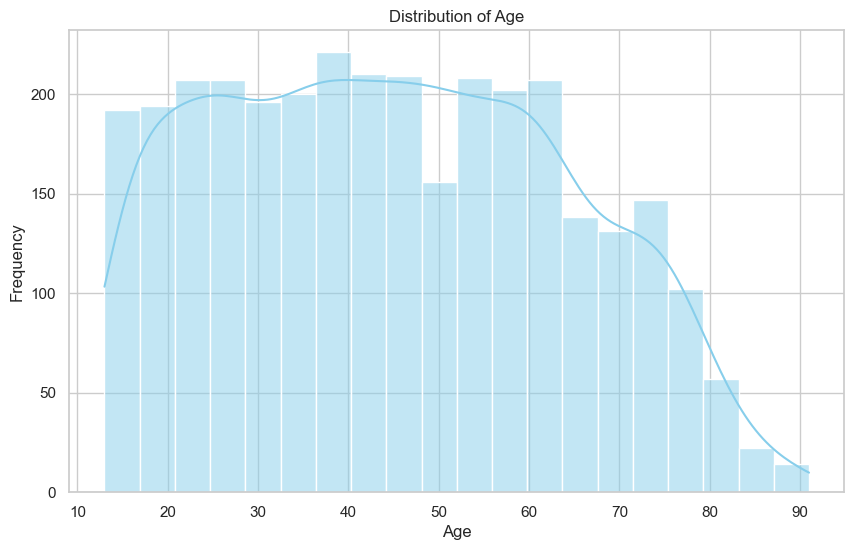

C:\Users\Devaire User\AppData\Local\Temp\ipykernel_15812\2626191467.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', palette='viridis')


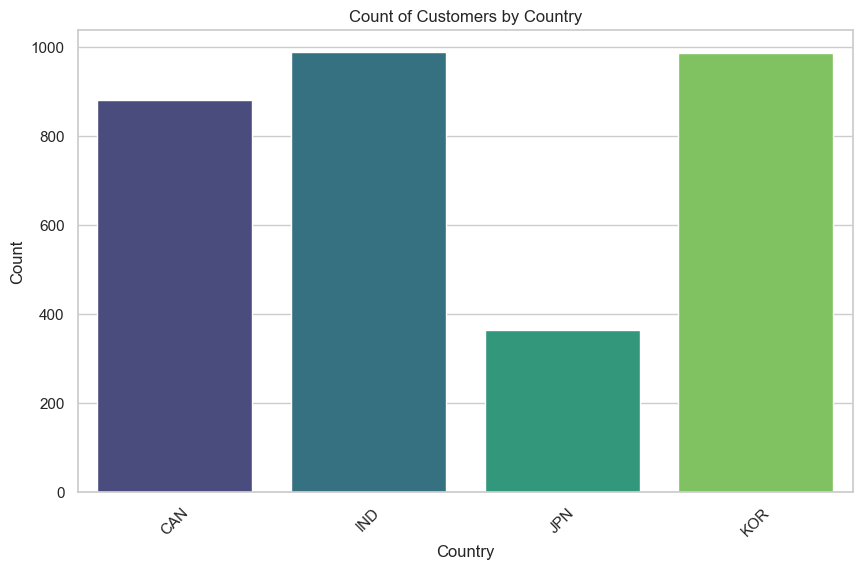

C:\Users\Devaire User\AppData\Local\Temp\ipykernel_15812\2626191467.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')


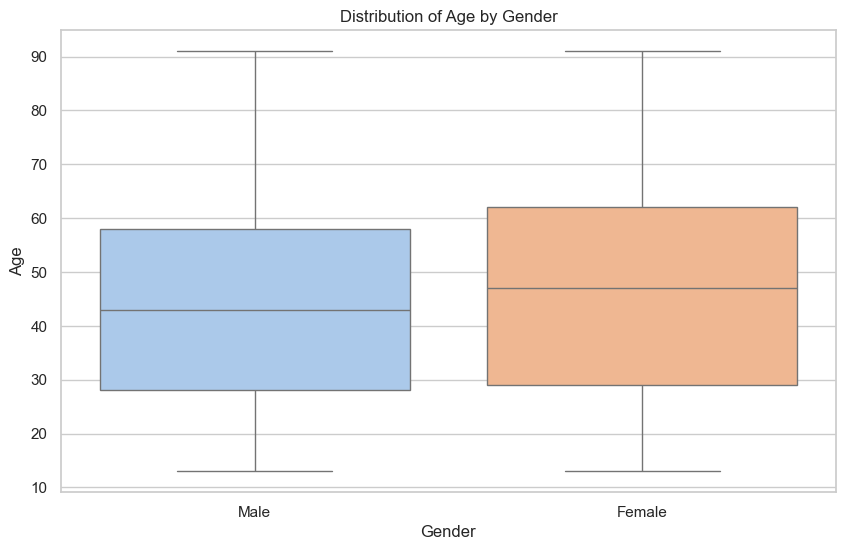

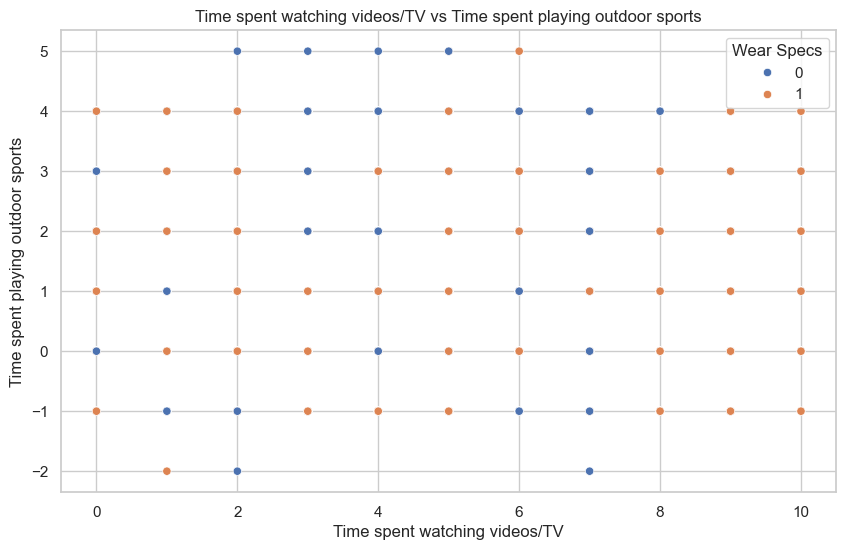

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', palette='viridis')
plt.title('Count of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')
plt.title('Distribution of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time spent watching videos/TV', y='Time spent playing outdoor sports', hue='Wear Specs')
plt.title('Time spent watching videos/TV vs Time spent playing outdoor sports')
plt.xlabel('Time spent watching videos/TV')
plt.ylabel('Time spent playing outdoor sports')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df.copy()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target variable (y)
X = df_encoded.drop('Wear Specs', axis=1)
y = df_encoded['Wear Specs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7795031055900621
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       302
           1       0.76      0.85      0.80       342

    accuracy                           0.78       644
   macro avg       0.78      0.77      0.78       644
weighted avg       0.78      0.78      0.78       644

Confusion Matrix:
[[212  90]
 [ 52 290]]


In [15]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Evaluate metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Cross-Validation Scores: [0.74806202 0.78834951 0.77087379 0.7631068  0.77475728]
Mean CV Score: 0.7690298788289305
Accuracy: 0.7795031055900621
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       302
           1       0.76      0.85      0.80       342

    accuracy                           0.78       644
   macro avg       0.78      0.77      0.78       644
weighted avg       0.78      0.78      0.78       644

Confusion Matrix:
[[212  90]
 [ 52 290]]
